### FinanceDataReader ?
* 한국 주식 가격, 미국 주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

In [47]:
# 설치
#!pip install -U finance-datareader
# !pip install seaborn

     |████████████████████████████████| 285 kB 2.0 MB/s eta 0:00:01


In [48]:
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
#FinanceeDataReader as pdr
import FinanceDataReader as fdr

fdr.__version__

'0.9.20'

In [15]:
#!pip install beautifulsoup4

### 한국거래소 상장 종목 전체 가져오기

In [16]:
#도움말을 볼때는 ? 를 사용하고 소스코드를 볼때는 ??
#주피터 노트북에서는 함수나 메소드의 괄호 안에서 shift+ tab 키를 누르면 도움말을 볼 수 있음
fdr.StockListing??

In [10]:
#KRX 
#KOSPI
#KOSDAQ 
#KONEX 
#NASDAQ
#NYSE
#SP500

df_krx = fdr.StockListing("KRX")
df_krx.shape

(6537, 10)

In [11]:
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6537 entries, 0 to 6536
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          6537 non-null   object        
 1   Market          6537 non-null   object        
 2   Name            6537 non-null   object        
 3   Sector          2421 non-null   object        
 4   Industry        2402 non-null   object        
 5   ListingDate     2421 non-null   datetime64[ns]
 6   SettleMonth     2421 non-null   object        
 7   Representative  2421 non-null   object        
 8   HomePage        2245 non-null   object        
 9   Region          2421 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 561.8+ KB


In [12]:
#object 타입은 문자열
#기술통계 값을 요약

df_krx.describe()

/Users/jin/opt/anaconda3/envs/jin_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,6537,6537,6537,2421,2402,2421,2421,2421,2245,2421
unique,6537,3,6537,158,2250,1784,9,2307,2224,22
top,52FH73,KOSPI,한세엠케이,특수 목적용 기계 제조업,기업인수합병,1996-07-03 00:00:00,12월,-,http://www.poongsan.co.kr,서울특별시
freq,1,4893,1,142,37,8,2360,5,2,977
first,NaN,NaN,NaN,NaN,NaN,1956-03-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2021-02-16 00:00:00,NaN,NaN,NaN,NaN


### 파일로 저장하고 불러오기

In [13]:
#to_csv 로 Dataframe을 데이터 저장 파일 csv 파일로 바꿈
df_krx.to_csv("krx.csv", index=False)

In [14]:
#csv로 저장된 파일 df로 읽어서 확인
pd.read_csv("krx.csv")

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6532,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6533,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6534,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6535,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [15]:
df = pd.read_csv("krx.csv")
df.shape

(6537, 10)

### 상장종목 목록 사용하기
* 종목명과 심볼을 찾기 위해 상장 종목 목록 사용

In [16]:
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
6532,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6533,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6534,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
6535,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


In [17]:
df_krx[["Symbol", "Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [18]:
df_krx["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
6532    흥국화재2우B
6533      흥국화재우
6534       흥아해운
6535         희림
6536         힘스
Name: Name, Length: 6537, dtype: object

In [19]:
item_name = "빅히트"
df_krx.loc[df_krx["Name"] == item_name,"Symbol"]
df_krx.loc[df_krx["Name"] == item_name,"Symbol"].tolist()[0]

'352820'

In [20]:
df_krx.loc[df_krx["Name"] == item_name,"Symbol"].tolist()[0]

'352820'

### 종목명으로 종목 코드 받아오는 함수 만들기

In [21]:
# 종목명으로 종목 코드 ㅂ다아오는 함수 만들기
# df_krx의 Name column 에서 같은 값이 있으면 Row의 Symbol 컬럼 값을 List 로 name_list에
def item_code_by_item_name(item_name):
    """
    종목명을 받아서 종목 코드를 찾아 반환하는 함수
    """
    item_code_list = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].tolist()
    if len(item_code_list) > 0:
        return item_code_list

In [22]:
item_code_by_item_name("카카오게임즈")

['293490']

In [23]:
fdr.DataReader(item_code_by_item_name("삼성전자"))

AttributeError: 'list' object has no attribute 'isdigit'

In [ ]:
df = df_krx
df

In [ ]:
#하나의 행만 가져오기
df["Name"]

### 데이터 색인하기
 #### Series

In [ ]:
type(df["Name"])

In [ ]:
#특정 값만 가져오기
df.loc[0]

In [ ]:
type(df.loc[0])

In [24]:
#df 변수 타입 - DataFrame
type(df)

pandas.core.frame.DataFrame

In [25]:
# 여러 컬럼을 지정할때는 리스트 형태로 묶어야 함
# 2차원 행렬은 대괄호가 [] 2개
df[["Name","Symbol"]].head()

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520


In [26]:
#여러개의 행을 가지고 올때도 [] 대괄호 2개 리스트 형태로 묶어줌
df.loc[[0,3,5,7]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### DataFrame

In [27]:
#1개의 컬럼을 가져올 때 대괄호 2개 써서 리스트 형태로 묶어주면 데이터 프레임 형태
df[["Name"]]
type(df[["Name"]])

pandas.core.frame.DataFrame

In [28]:
type(df["Name"])

pandas.core.series.Series

#### loc를 통한 서브셋 가져오기

In [29]:
#행과 열 가져오기
#.loc[행, 열]
df["Name"][0] #데이터 프레임을 2번 접근하게 되서 비효율적
df.loc[0,"Name"]

'3S'

In [30]:
#여러개의 행과 하나의 컬럼 가져오기
df.loc[[0,1,2],"Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [31]:
#여러개의 행과 여러개의 컬럼
df.loc[[0,1,2,3],["Name","Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620


#### Boolean Indexing
* 결과값이 True, False 형태로 반환됨
* Boolean Indexing 을 통해 특정 조건식을 만족하는 데이터를 가져옴


In [32]:
#카카오 찾기
df[df["Name"] == "카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
4535,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"여민수, 조수용",http://www.kakaocorp.com,제주특별자치도


In [33]:
#서울특별시에 소재지를 두고 있는 KOSPI 종목을 종목명과 심볼을 가져오기
#.loc[행,열]
#.loc[조건식, 열]
df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"),["Name","Symbol"]]

,Name,Symbol
1,AJ네트웍스,095570
2,AK홀딩스,006840
47,BGF,027410
48,BGF리테일,282330
50,BYC,001460
...,...,...
6520,휴비스,079980
6522,휴스틸,005010
6526,휴켐스,069260
6531,흥국화재,000540


### 파생변수 만들기

In [34]:
#PD.TO_DATETIME 을 통해서 데이터 타입을 변환
df["ListingDate"] = pd.to_datetime(df["ListingDate"])

In [35]:
# ListingYear 파생변수 만들기
df["ListingYear"] = df["ListingDate"].dt.year

In [36]:
type(np.nan)

float

In [37]:
# df[["ListingDate","ListingYear"]].describe()
df[["ListingDate","ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

### 데이터 시각화를 위한 폰트설정

#### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

#### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

#### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [55]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [56]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'AppleGothic'

In [58]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글폰트'}>

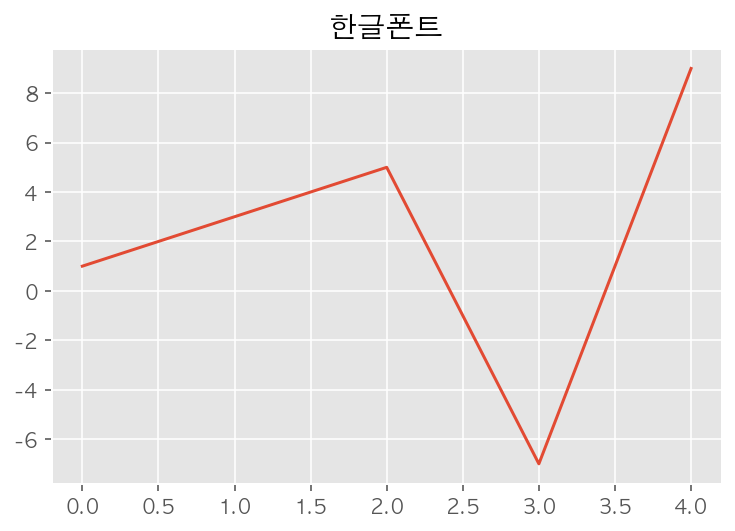

In [59]:
# 한글폰트 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

### 한 개의 변수 빈도수 구하고 시각화 하기

* Keyword

* Series.value_counts()
* Series.value_counts().plot()
* Series.value_counts().plot.bar()
* Series.value_counts().plot.barh()
* sns.countplot()

#### Market
* KOSPI (Korea Composite Stock Price Index)
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667
* KOSDAQ (Korea Securities Dealers Automated Quotation)
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659
* KONEX(Korea New Exchange) :
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다.
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [42]:
# Market column에 어떤 데이터들이 있는지 확인합니다.
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [43]:
#빈도수
df["Market"].value_counts()

KOSPI     4893
KOSDAQ    1504
KONEX      140
Name: Market, dtype: int64

<AxesSubplot:>

findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


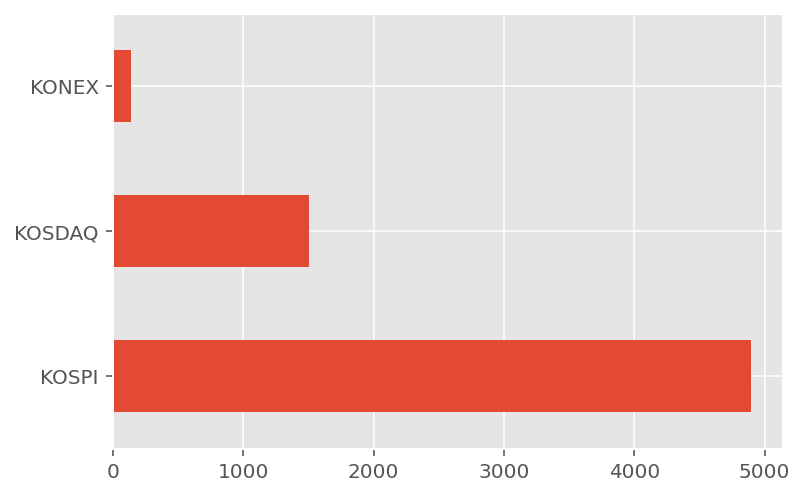

In [44]:
# df["Market"].value_counts().plot(kind="barh")
df["Market"].value_counts().plot.barh()

<AxesSubplot:xlabel='count', ylabel='Market'>

findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


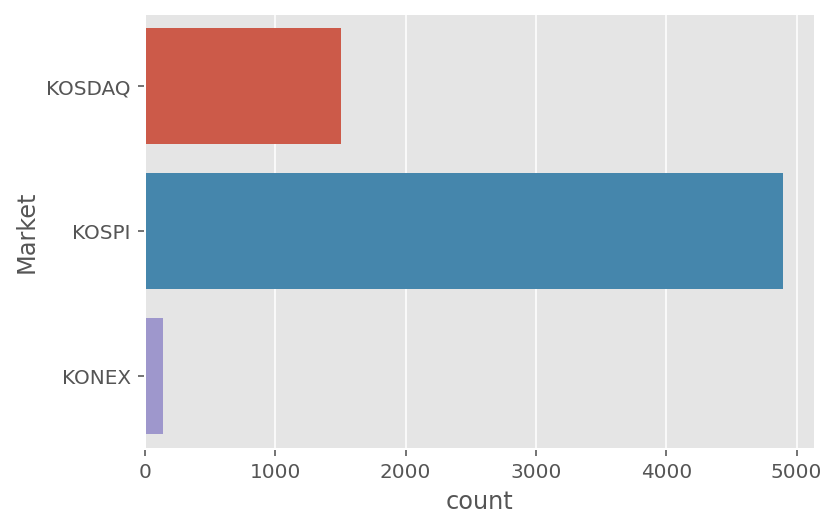

In [49]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df, y="Market")

In [50]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
sector_count_top = df["Sector"].value_counts().head(30)
sector_count_top

특수 목적용 기계 제조업                            142
소프트웨어 개발 및 공급업                           139
전자부품 제조업                                 122
자동차 신품 부품 제조업                             97
의약품 제조업                                   93
기타 금융업                                    93
기타 화학제품 제조업                               91
금융 지원 서비스업                                72
통신 및 방송 장비 제조업                            72
1차 철강 제조업                                 57
반도체 제조업                                   57
자연과학 및 공학 연구개발업                           54
의료용 기기 제조업                                50
플라스틱제품 제조업                                43
일반 목적용 기계 제조업                             43
기초 화학물질 제조업                               43
기타 전문 도매업                                 42
기초 의약물질 및 생물학적 제제 제조업                     38
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   35
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         34
기타 식품 제조업                                 33
영화, 비디오물, 방송프로그램 제작 및 배급업                 33
의료용품 및 기타 

<AxesSubplot:title={'center':'Sector 빈도수'}>

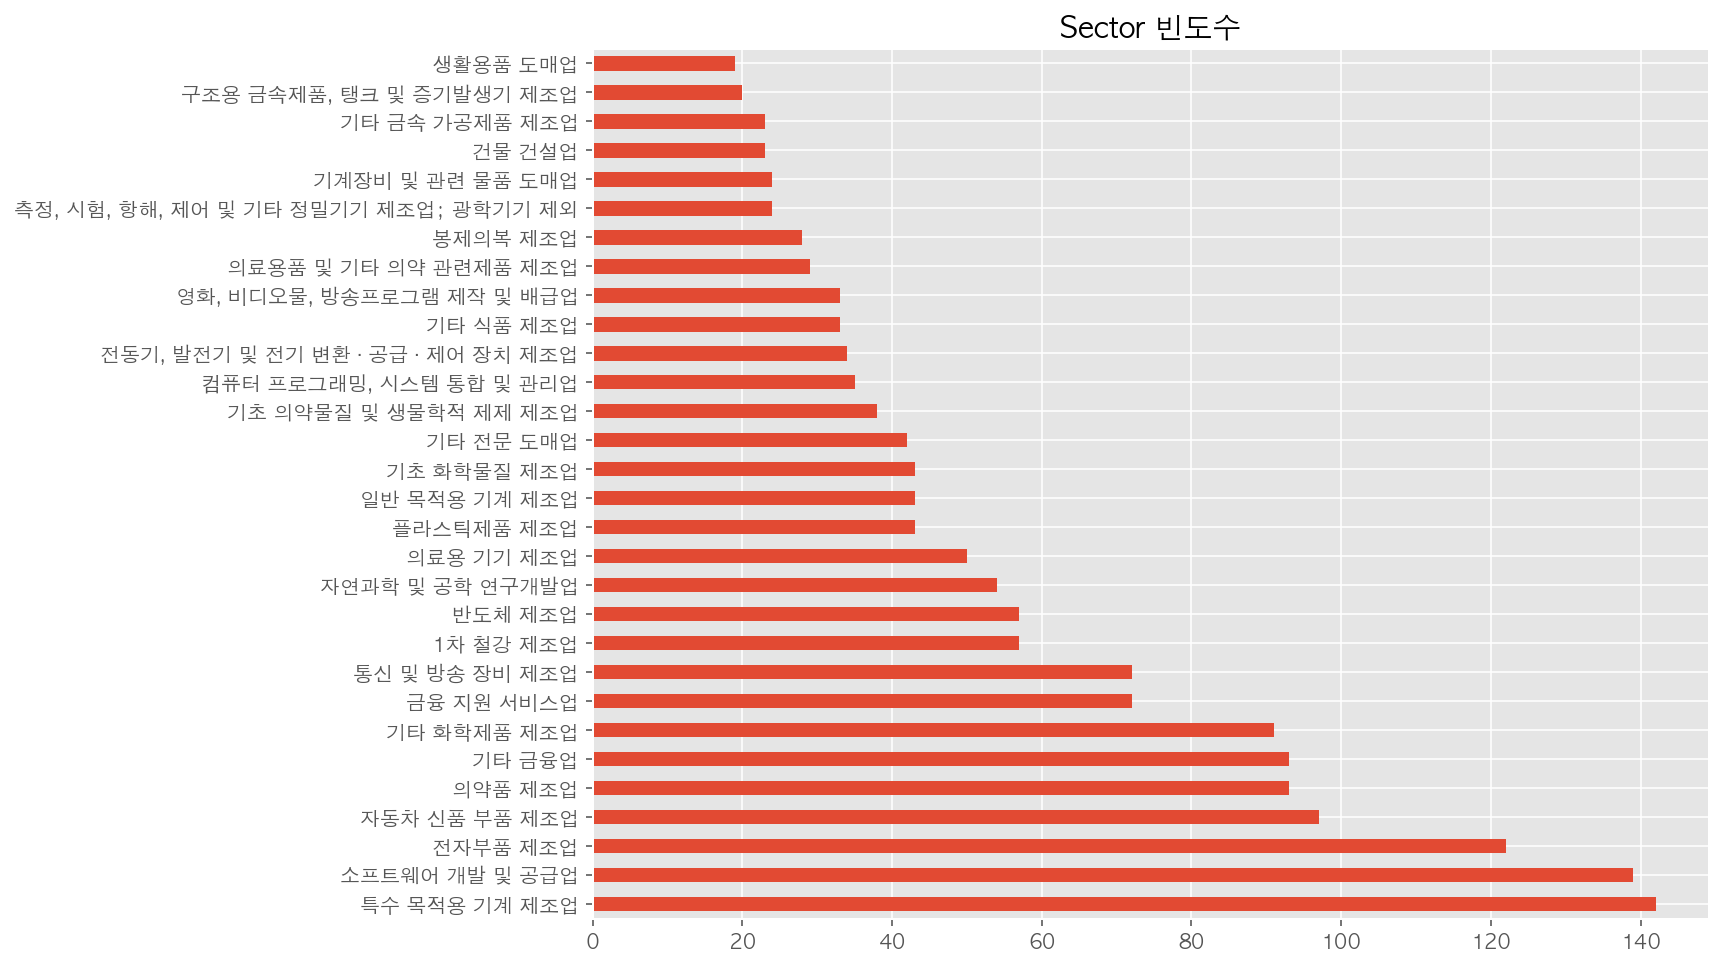

In [60]:
sector_count_top.plot.barh(figsize=(10, 8), title="Sector 빈도수")

In [61]:
df[df["Sector"].isin(sector_count_top.index)]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
6525,145020,KOSDAQ,휴젤,기초 의약물질 및 생물학적 제제 제조업,"보툴리눔톡신, 필러",2015-12-24,12월,손지훈,http://www.hugel.co.kr,강원도,2015.0
6526,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시,2002.0
6527,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시,1994.0
6528,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


<AxesSubplot:xlabel='count', ylabel='Sector'>

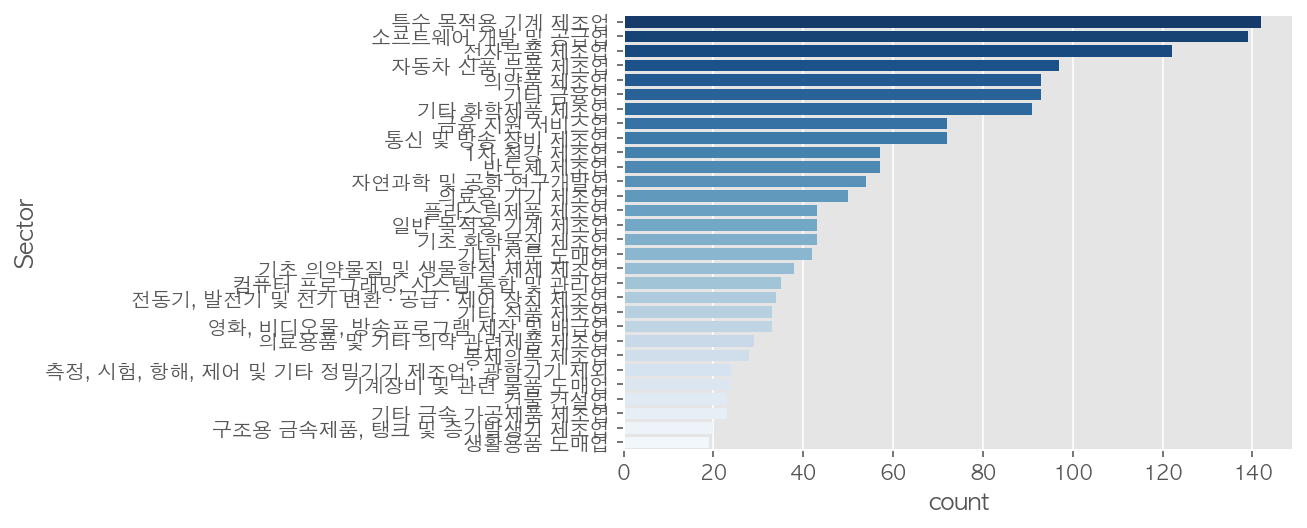

In [62]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data=df[df["Sector"].isin(sector_count_top.index)], 
              y="Sector", palette="Blues_r",
              order=sector_count_top.index)

In [63]:
# 빈도수가 가장 많은 데이터 색인하기
df[df["Sector"] == "특수 목적용 기계 제조업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
80,068790,KOSDAQ,DMS,특수 목적용 기계 제조업,LCD 제조장비,2004-10-01,12월,박용석,http://www.dms21.co.kr,경기도,2004.0
100,083450,KOSDAQ,GST,특수 목적용 기계 제조업,"GasScrubber,Chiller",2006-02-01,12월,김덕준,http://www.gst-in.com,경기도,2006.0
124,078150,KOSDAQ,HB테크놀러지,특수 목적용 기계 제조업,TFT-LCD검사장비,2004-12-08,12월,문성준,http://www.ncbnet.co.kr,충청남도,2004.0
...,...,...,...,...,...,...,...,...,...,...,...
6496,010660,KOSPI,화천기계,특수 목적용 기계 제조업,"선반,밀링,연삭기,CNC선반,CNC밀링,머시닝센타 제조,판매/자동차부품(실린더블럭) 제조",1988-12-12,12월,"권영열, 권형석",http://www.hwacheon.co.kr,서울특별시,1988.0
6497,000850,KOSPI,화천기공,특수 목적용 기계 제조업,"CNC선반,CNC밀링,연마기(금속공작기계),MC공작기계,COPY밀링기계,주방품 제조,도매",1999-11-18,12월,"각자대표이사 권영두, 권영렬",http://www.hwacheon.com,광주광역시,1999.0
6513,090710,KOSDAQ,휴림로봇,특수 목적용 기계 제조업,제조업용로봇및서비스로봇,2006-12-05,12월,정광원,http://www.dstrobot.com,충청남도,2006.0
6528,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


In [64]:
# Industry 의 빈도수를 구합니다.
df["Industry"].value_counts()

기업인수합병                           37
지주회사                             19
지주사업                              9
모바일게임                             7
화장품                               7
                                 ..
아트지,CCP지                          1
냉연강판, 이중바닥재                       1
마이크로스피커, 블루투스헤드셋, Linear 진동모터     1
다이어리                              1
캐니스터,플라스틱필러넥,의장부품                 1
Name: Industry, Length: 2250, dtype: int64